In [149]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as d
import matplotlib.units as u
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from scipy.stats import gaussian_kde
import astropy.units as u
from astropy.coordinates import Angle

In [2]:
def multi_scatter(path, x, xlog, y, ylog, w, wlog, xlabel, ylabel, cblabel, title, fit, path2, x2, x2log, y2, y2log, w2, w2log, xlabel2, ylabel2, cblabel2, title2, fit2):
    """
    Args:
        path = str, csv path
        x = str, column name for x data
        xlog = True/False, takes the logarithm of x data
        y = str, column name for y data
        ylog = True/False, takes the logarithm of y data
        w = str, column name for weight data
        wlog = True/False, takes the logarithm of weight data
        xlabel = str, label for x axis
        ylabel = str, label for y axis
        cblabel = str, label for colorbar
        title = str, plot title
        fit = True/False, optional linear regression fit with eq./correl. value
        multi = True/False, toggle 2 scatter plots with the same arguments
        x2, x2log, y2, y2log, w2, w2log, xlabel2, ylabel2, cblabel2, title2, fit2
    """
    df = pd.read_csv(path)
    
    x = df[x].values
    y = df[y].values
    w = df[w].values
    
    if xlog:
        x = np.log10(np.where(x > 0, x, np.nan))
    if ylog:
        y = np.log10(np.where(y > 0, y, np.nan))
    if wlog:
        w = np.log10(np.where(w > 0, w, np.nan))
                     
    valid = ~np.isnan(x) & ~np.isnan(y) & ~np.isnan(w)
    x = x[valid].reshape(-1, 1)
    y = y[valid]
    w = w[valid]

    x2 = df[x2].values
    y2 = df[y2].values
    w2 = df[w2].values

    if x2log:
        x2 = np.log10(np.where(x2 > 0, x2, np.nan))
    if y2log:
        y2 = np.log10(np.where(y2 > 0, y2, np.nan))
    if w2log:
        w2 = np.log10(np.where(w2 > 0, w2, np.nan))
                     
    valid2 = ~np.isnan(x2) & ~np.isnan(y2) & ~np.isnan(w2)
    x2 = x2[valid2].reshape(-1, 1)
    y2 = y2[valid2]
    w2 = w2[valid2]
        
  
    fig, axs = plt.subplots(1, 2, figsize=(12, 4))
    sc = axs[0].scatter(x, y, c=w, cmap='jet', s=12)
    axs[0].set_xlabel(xlabel)
    axs[0].set_ylabel(ylabel)

    cbar = fig.colorbar(sc, ax=axs[0])
    cbar.set_label(cblabel)

    if fit:
        model = LinearRegression()
        model.fit(x, y)
        y_pred = model.predict(x)
        r2 = r2_score(y, y_pred)
        coeff = model.coef_[0]
        intercept = model.intercept_
        
        axs[0].plot(x, y_pred, color='black', linewidth=1, label=f"$y = {coeff:.2f}x + {intercept:.2f}$", zorder=5)
        axs[0].legend()
        axs[0].set_title(f"{title}\n$R^2 = {r2:.3f}$")
        
    else:
        axs[0].set_title(title)

    sc2 = axs[1].scatter(x2, y2, c=w2, cmap='jet', s=12, alpha=0.7)
    axs[1].set_xlabel(xlabel2)
    axs[1].set_ylabel(ylabel2)

    cbar2 = fig.colorbar(sc, ax = axs[1])
    cbar2.set_label(cblabel2)

    if fit2:
        model2 = LinearRegression()
        model2.fit(x2, y2)
        y_pred2 = model2.predict(x2)
        r22 = r2_score(y2, y_pred2)
        coeff2 = model2.coef_[0]
        intercept2 = model2.intercept_
        
        axs[1].plot(x2, y_pred2, color='black', linewidth=1, label=(f"$y = {coeff2:.2f}x + {intercept2:.2f}$"))
        axs[1].legend()
        axs[1].set_title(f"{title2}\n$R^2 = {r22:.3f}$")
        
    else:
        axs[1].set_title(title2)

    axs[0].grid(lw=0.5)
    axs[1].grid(lw=0.5)

    plt.tight_layout()
    plt.show()

In [289]:
def scatter(path, x, xlog, y, ylog, w, wlog, xlabel, ylabel, cblabel, title, fit):
    """
    Args:
        path = str, csv path
        x = str, column name for x data
        xlog = True/False, takes the logarithm of x data
        y = str, column name for y data
        ylog = True/False, takes the logarithm of y data
        w = str, column name for weight data
        wlog = True/False, takes the logarithm of weight data
        xlabel = str, label for x axis
        ylabel = str, label for y axis
        cblabel = str, label for colorbar
        title = str, plot title
        fit = True/False, optional linear regression fit with eq./correl. value
        multi = True/False, toggle 2 scatter plots with the same arguments
        x2, x2log, y2, y2log, w2, w2log, xlabel2, ylabel2, cblabel2, title2, fit2
    """
    df = pd.read_csv(path)
    
    x = df[x].values
    y = df[y].values
    w = df[w].values
    
    if xlog:
        x = np.log10(np.where(x > 0, x, np.nan))
    if ylog:
        y = np.log10(np.where(y > 0, y, np.nan))
    if wlog:
        w = np.log10(np.where(w > 0, w, np.nan))
                     
    valid = ~np.isnan(x) & ~np.isnan(y) & ~np.isnan(w)
    x = x[valid]
    y = y[valid]
    w = w[valid]
   
    fig, ax = plt.subplots(figsize=(8, 6))
    sc = ax.scatter(x, y, c=w, cmap='jet', s=12, alpha=0.7, marker='.')
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

    cbar = fig.colorbar(sc, ax=ax)
    cbar.set_label(cblabel)

    if fit:
        model = LinearRegression()
        model.fit(x, y)
        y_pred = model.predict(x)
        r2 = r2_score(y, y_pred)
        coeff = model.coef_[0]
        intercept = model.intercept_
        
        ax.plot(x, y_pred, color='black', linewidth=1, label=f"$y = {coeff:.2f}x + {intercept:.2f}$")
        ax.legend()
        ax.set_title(f"{title}\n$R^2 = {r2:.3f}$")
        
    else:
        ax.set_title(title)

    xy = np.vstack([x, y])
    kde = gaussian_kde(xy)
    x_grid = np.linspace(x.min()*.5, x.max()*.5, 100)
    y_grid = np.linspace(y.min()*.5, y.max()*.5, 100)
    X, Y = np.meshgrid(x_grid, y_grid)
    positions = np.vstack([X.ravel(), Y.ravel()])
    Z = kde(positions).reshape(X.shape)
    plt.contour(X, Y, Z, colors='r', levels=8, linewidths=0.7)
    
    plt.axvline(x=1, color='r', lw=0.5)
    plt.axhline(y=1, color='r', lw=0.5)
    ax.tick_params(direction='in', length=5, top=True, bottom=True, left=True, right=True)
    ax.grid(lw=0.5, alpha=0.5)
    plt.tight_layout()
    plt.show()

In [21]:
def markers_scatter(path, x_list, xlog_list, y, ylog, y2, y2log, w, wlog, xlabel, ylabel, y2label, cblabel, title, fit):
    """
    Args:
        path = str, csv path
        x_list = list of str, column names for x data
        xlog_list = list of bool, takes the logarithm of each x data series
        y = str, column name for y data
        ylog = True/False, takes the logarithm of y data
        w = str or None, column name for weight data
        wlog = True/False, takes the logarithm of weight data
        xlabel = str, label for x axis
        ylabel = str, label for y axis
        cblabel = str, label for colorbar
        title = str, plot title
        fit = True/False, optional linear regression fit when single series
    """
    df = pd.read_csv(path)
    
    markers = ['o','o','o','o','o','o']
    sizes = [15,15,15,15,15,15]
    
    xs = []
    for i, col in enumerate(x_list):
        arr = df[col].values
        if xlog_list[i]:
            arr = np.log10(np.where(arr > 0, arr, np.nan))
        xs.append(arr)
        
    y_arr = df[y].values
    y_arr2 = df[y2].values
    
    if ylog:
        y_arr = np.log10(np.where(y_arr > 0, y_arr, np.nan))

    if y2log:
        y_arr2 = np.log10(np.where(y_arr2 > 0, y_arr2, np.nan))
        
    if w:
        wc = df[w].values
        if wlog:
            wc = np.log10(np.where(wc > 0, wc, np.nan))
            
    fig, ax1 = plt.subplots(figsize=(8, 6))
    
    if w:
        for i in range(len(xs)):
            valid = ~np.isnan(xs[i]) & ~np.isnan(y_arr) & ~np.isnan(y_arr2) & ~np.isnan(wc)
            mask_x = xs[i][valid]
            mask_y = y_arr[valid]
            mask_y2 = y_arr2[valid]
            c = wc[valid]
            sc = ax1.scatter(mask_x, mask_y, c=c, cmap='jet', s=sizes[i], marker=markers[i], alpha=0.7)
        cbar = fig.colorbar(sc, ax=ax1)
        cbar.set_label(cblabel)
    else:
        for i in range(len(xs)):
            valid = ~np.isnan(xs[i]) & ~np.isnan(y_arr) & ~np.isnan(y_arr2)
            mask_x = xs[i][valid]
            mask_y = y_arr[valid]
            mask_y2 = y_arr2[valid]
            ax1.scatter(mask_x, mask_y, s=sizes[i], marker=markers[i], alpha=0.7, label=x_list[i])
        ax1.legend(frameon=False, markerfirst=False, fontsize=8)
        
    ax1.set_xlabel(xlabel, fontsize=14)
    ax1.set_ylabel(ylabel, fontsize=14)

    ax2 = ax1.twinx()

    ax2.set_ylabel(y2label, fontsize=14)
    ax2.tick_params(axis='y', direction='in', right=True)
    
    if fit and len(x_list) == 1:
        x0 = xs[0].reshape(-1, 1)
        y0 = y_arr[~np.isnan(xs[0]) & ~np.isnan(y_arr)]
        model = LinearRegression()
        model.fit(x0, y0)
        y_pred = model.predict(x0)
        r2 = r2_score(y0, y_pred)
        coeff = model.coef_[0]
        intercept = model.intercept_
        ax1.plot(x0, y_pred, color='black', linewidth=1, label=f"$y = {coeff:.2f}x + {intercept:.2f}$")
        ax1.legend()
        ax1.set_title(f"{title}\n$R^2 = {r2:.3f}$")
    else:
        ax1.set_title(title)
        
    # ax.grid(lw=0.5)
    ax1.tick_params(direction='in', length=5, top=True, bottom=True, left=True)
    plt.tight_layout()
    plt.show()


In [308]:
def markers_scatter2(path, x_list, xlog_list, y, ylog, w, wlog, xlabel, ylabel, y2label, cblabel, title, fit):
    """
    Args:
        path = str, csv path
        x_list = list of str, column names for x data
        xlog_list = list of bool, takes the logarithm of each x data series
        y = str, column name for y data
        ylog = True/False, takes the logarithm of y data
        w = str or None, column name for weight data
        wlog = True/False, takes the logarithm of weight data
        xlabel = str, label for x axis
        ylabel = str, label for y axis
        cblabel = str, label for colorbar
        title = str, plot title
        fit = True/False, optional linear regression fit when single series
    """
    df = pd.read_csv(path)
    
    markers = ['o','o','o','o','o','o']
    sizes = [15,15,15,15,15,15]
    
    xs = []
    for i, col in enumerate(x_list):
        arr = df[col].values
        if xlog_list[i]:
            arr = np.log10(np.where(arr > 0, arr, np.nan))
        xs.append(arr)
        
    y_arr = df[y].values
    
    if ylog:
        y_arr = np.log10(np.where(y_arr > 0, y_arr, np.nan))
        
    if w:
        wc = df[w].values
        if wlog:
            wc = np.log10(np.where(wc > 0, wc, np.nan))
            
    fig, ax = plt.subplots(figsize=(8, 8))
    
    if w:
        for i in range(len(xs)):
            valid = ~np.isnan(xs[i]) & ~np.isnan(y_arr) & ~np.isnan(wc)
            mask_x = xs[i][valid]
            mask_y = y_arr[valid]
            c = wc[valid]
            sc = ax.scatter(mask_x, mask_y, c=c, cmap='jet', s=sizes[i], marker=markers[i], alpha=0.5)
        cbar = fig.colorbar(sc, ax=ax)
        cbar.set_label(cblabel)
    else:
        for i in range(len(xs)):
            valid = ~np.isnan(xs[i]) & ~np.isnan(y_arr)
            mask_x = xs[i][valid]
            mask_y = y_arr[valid]
            ax.scatter(mask_x, mask_y, s=sizes[i], marker=markers[i], alpha=0.5, label=x_list[i])
        # ax.legend(frameon=False, markerfirst=False, fontsize=8)
        
    ax.set_xlabel(xlabel, fontsize=14)
    ax.set_ylabel(ylabel, fontsize=14)
    
    
    if fit and len(x_list) == 1:
        x0 = xs[0].reshape(-1, 1)
        y0 = y_arr[~np.isnan(xs[0]) & ~np.isnan(y_arr)]
        model = LinearRegression()
        model.fit(x0, y0)
        y_pred = model.predict(x0)
        r2 = r2_score(y0, y_pred)
        coeff = model.coef_[0]
        intercept = model.intercept_
        ax.plot(x0, y_pred, color='black', linewidth=1, label=f"$y = {coeff:.2f}x + {intercept:.2f}$")
        ax.legend()
        ax.set_title(f"{title}\n$R^2 = {r2:.3f}$")
    else:
        ax.set_title(title)

    xy = np.vstack([mask_x, mask_y])
    kde = gaussian_kde(xy)
    x_grid = np.linspace(mask_x.min()*.3, mask_x.max()*.3, 100)
    y_grid = np.linspace(mask_y.min()*.3, mask_y.max()*.3, 100)
    X, Y = np.meshgrid(x_grid, y_grid)
    positions = np.vstack([X.ravel(), Y.ravel()])
    Z = kde(positions).reshape(X.shape)
    plt.contour(X, Y, Z, colors='r', levels=8, linewidths=0.7)
    
    plt.axvline(x=0, color='black', lw=0.5)
    plt.axhline(y=0, color='black', lw=0.5)
    ax.grid(lw=0.5, alpha=0.5)
    ax.tick_params(direction='in', length=5, top=True, bottom=True, left=True, right=True)
    plt.tight_layout()
    plt.show()


In [89]:
def skyplot():
    """
    Args:
        
    """

In [190]:
from astropy.cosmology import Planck18 as cosmo
import numpy as np


cosmo.luminosity_distance(1).value

4*np.pi*((cosmo.luminosity_distance(1).value*3.086*10**22)**2)*((16/1000)*10**-26)*(1+1)**(-1+0.7)

7.173226598690209e+25

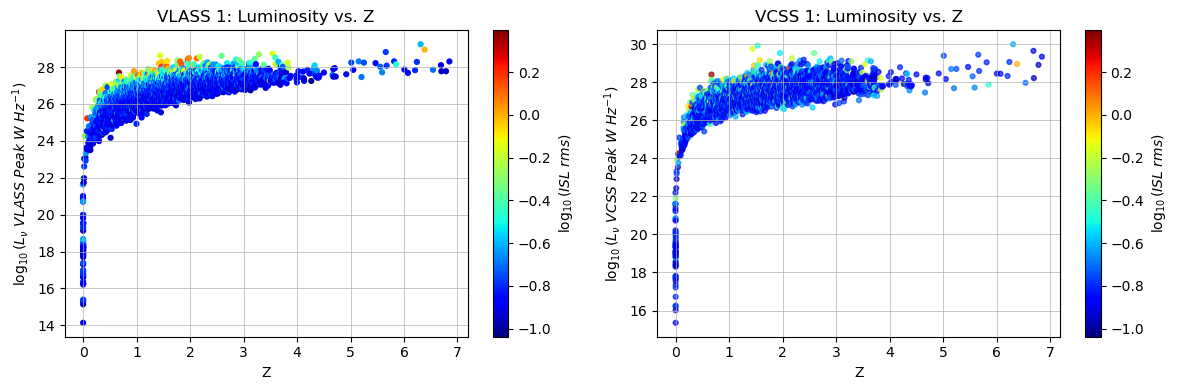

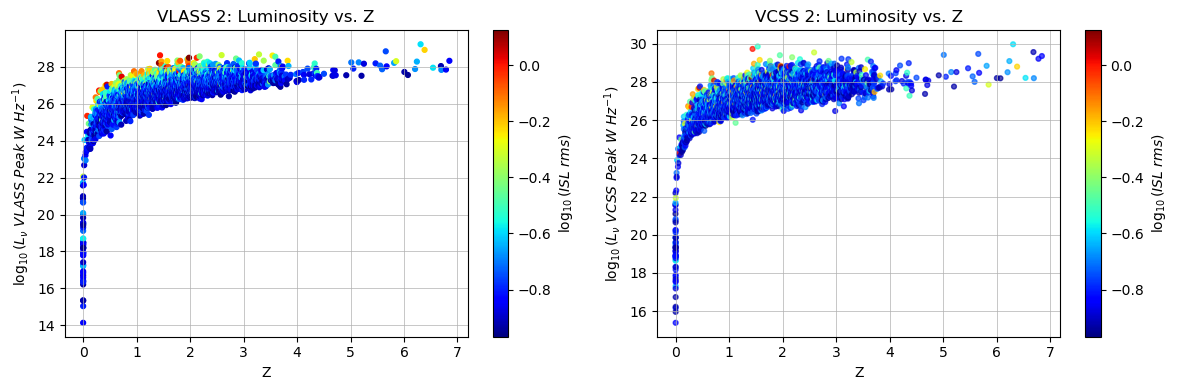

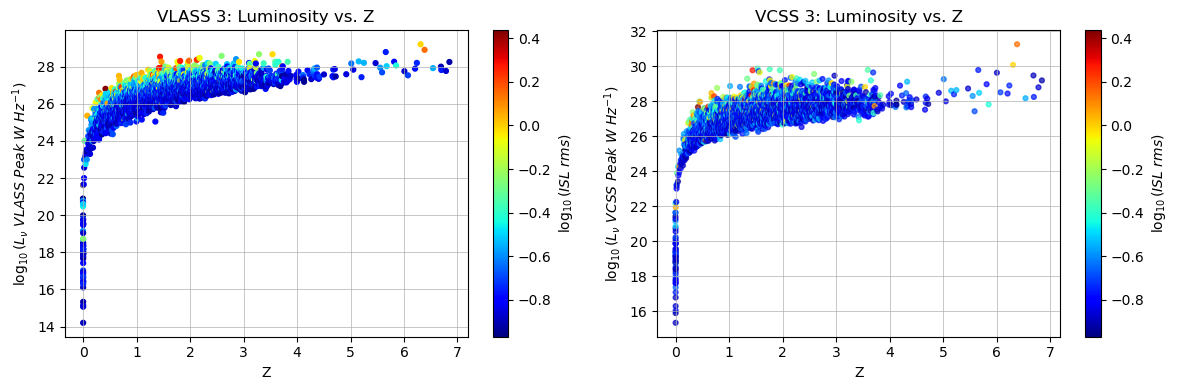

In [282]:
multi_scatter(path="C://Users/jray/Desktop/Ray/plotting/vlass_vcss_z_for_plotting.csv", x='Z', xlog=False, y='VLASS Luminosity 1', ylog=True, w='Isl rms 1', wlog=True, xlabel="Z", ylabel=r'$\log_{10}(L_{\nu} \ VLASS \ Peak \ W \ Hz^{-1})$', cblabel=r'$\log_{10}(ISL \ rms)$', title="VLASS 1: Luminosity vs. Z", fit=False, path2='C://Users/jray/Desktop/Ray/plotting/vlass_vcss_z_for_plotting.csv', x2='Z', x2log=False, y2='VCSS Luminosity 1', y2log=True, w2='Isl rms 1', w2log=True, xlabel2="Z", ylabel2=r'$\log_{10}(L_{\nu} \ VCSS \ Peak \ W \ Hz^{-1})$', cblabel2=r'$\log_{10}(ISL \ rms)$', title2="VCSS 1: Luminosity vs. Z", fit2=False)
multi_scatter(path="C://Users/jray/Desktop/Ray/plotting/vlass_vcss_z_for_plotting.csv", x='Z', xlog=False, y='VLASS Luminosity 2', ylog=True, w='Isl rms 2', wlog=True, xlabel="Z", ylabel=r'$\log_{10}(L_{\nu} \ VLASS \ Peak \ W \ Hz^{-1})$', cblabel=r'$\log_{10}(ISL \ rms)$', title="VLASS 2: Luminosity vs. Z", fit=False, path2='C://Users/jray/Desktop/Ray/plotting/vlass_vcss_z_for_plotting.csv', x2='Z', x2log=False, y2='VCSS Luminosity 2', y2log=True, w2='Isl rms 2', w2log=True, xlabel2="Z", ylabel2=r'$\log_{10}(L_{\nu} \ VCSS \ Peak \ W \ Hz^{-1})$', cblabel2=r'$\log_{10}(ISL \ rms)$', title2="VCSS 2: Luminosity vs. Z", fit2=False)
multi_scatter(path="C://Users/jray/Desktop/Ray/plotting/vlass_vcss_z_for_plotting.csv", x='Z', xlog=False, y='VLASS Luminosity 3', ylog=True, w='Isl rms 3', wlog=True, xlabel="Z", ylabel=r'$\log_{10}(L_{\nu} \ VLASS \ Peak \ W \ Hz^{-1})$', cblabel=r'$\log_{10}(ISL \ rms)$', title="VLASS 3: Luminosity vs. Z", fit=False, path2='C://Users/jray/Desktop/Ray/plotting/vlass_vcss_z_for_plotting.csv', x2='Z', x2log=False, y2='VCSS Luminosity 3', y2log=True, w2='Isl rms 3', w2log=True, xlabel2="Z", ylabel2=r'$\log_{10}(L_{\nu} \ VCSS \ Peak \ W \ Hz^{-1})$', cblabel2=r'$\log_{10}(ISL \ rms)$', title2="VCSS 3: Luminosity vs. Z", fit2=False)

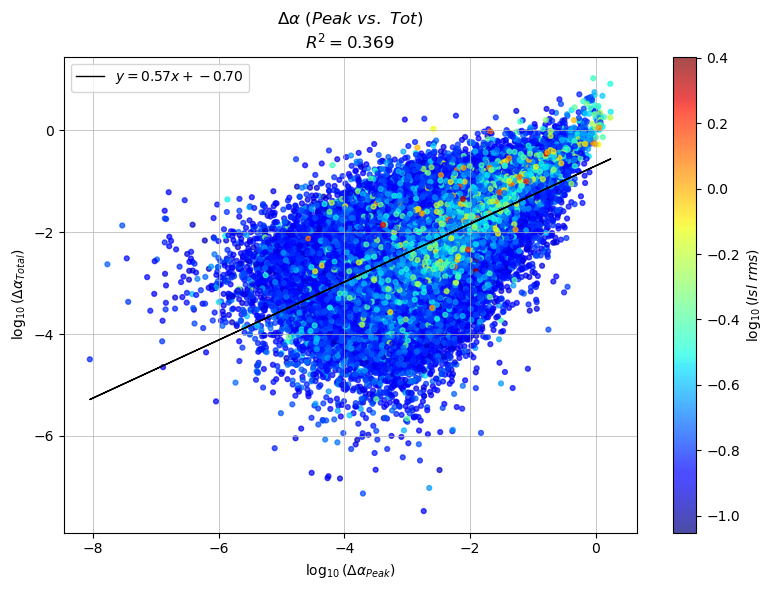

In [80]:
scatter(path="C://Users/jray/Desktop/Ray/plotting/corr_si.csv", x='SI Variance (Peak)', xlog=True, y='SI Variance (Tot)', ylog=True, w='RMS Isl 1', wlog=True, xlabel=r'$\log_{10}(\Delta\alpha_{Peak})$', ylabel=r'$\log_{10}(\Delta\alpha_{Total})$', cblabel=r'$\log_{10}(Isl \ rms)$', title=r'$\Delta\alpha \ (Peak \ vs. \ Tot)$', fit=True)

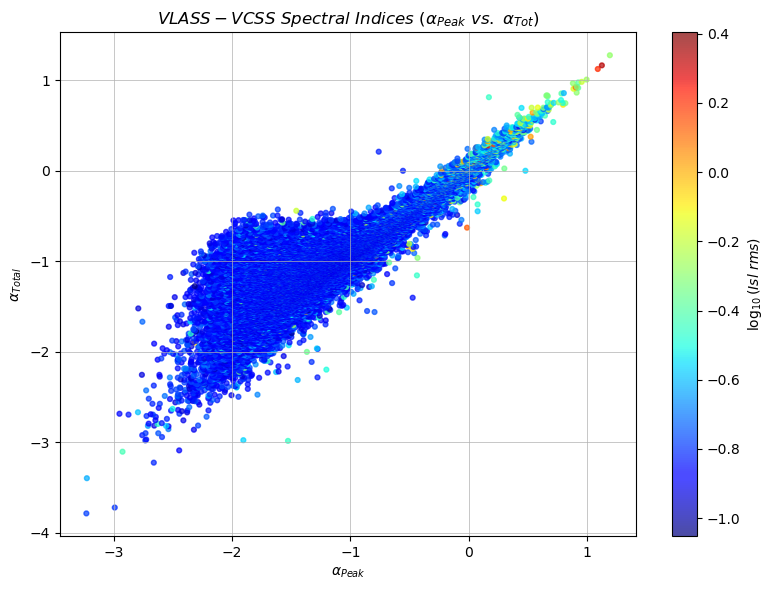

In [52]:
scatter(path="C://Users/jray/Desktop/Ray/plotting/corr_si.csv",
        x='SI avg (Peak)', 
        xlog=False, 
        y='SI avg (Tot)', 
        ylog=False, 
        w='RMS Isl 1',
        wlog=True,
        xlabel=r'$\alpha_{Peak}$',
        ylabel=r'$\alpha_{Total}$',
        cblabel=r'$\log_{10}(Isl \ rms)$',
        title=r'$VLASS-VCSS \ Spectral \ Indices \ (\alpha_{Peak} \ vs. \ \alpha_{Tot})$',
        fit=False)

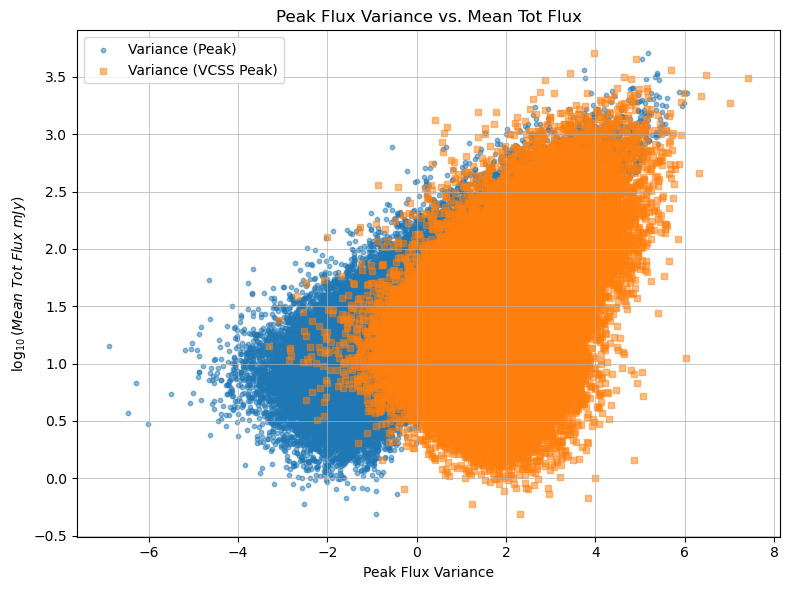

In [305]:
markers_scatter(path="C://Users/jray/Desktop/Ray/plotting/corr_si.csv",
                x_list=['Variance (Peak)', 'Variance (VCSS Peak)'],
                xlog_list=[True, True],
                y='mean_tot',
                ylog=True,
                w=None,
                wlog=False,
                legend_list=['Variance (Peak)', 'Variance (VCSS Peak)'],
                xlabel='Peak Flux Variance',
                ylabel=r'$\log_{10}(Mean \ Tot \ Flux \ mJy)$',
                cblabel='',
                title='Peak Flux Variance vs. Mean Tot Flux',
                fit=False)

C:\Users\jray\AppData\Local\Temp\ipykernel_27104\2674889007.py:17: DtypeWarning: Columns (139) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


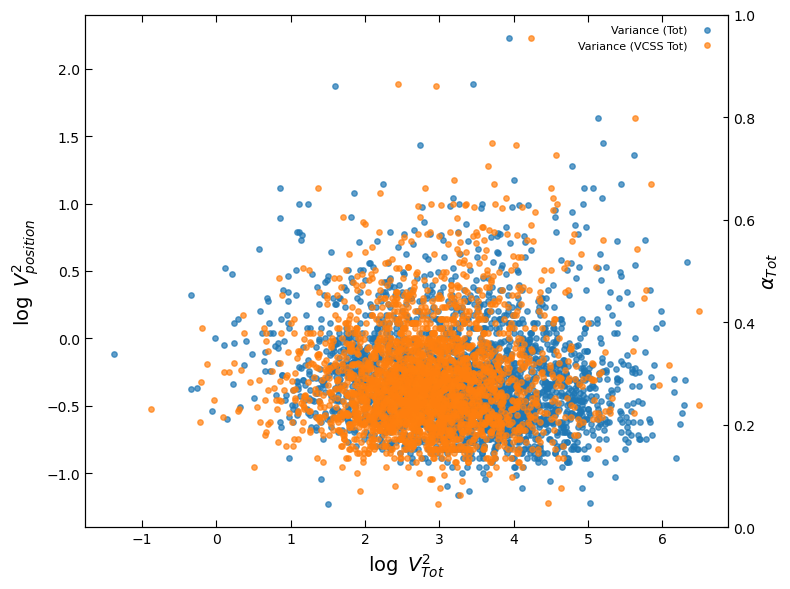

In [284]:
markers_scatter(path="C://Users/jray/Desktop/Ray/plotting/vlass_vcss_z_var_blazar.csv",
                x_list=['Variance (Tot)', 'Variance (VCSS Tot)'],
                xlog_list=[True, True],
                y='err_combined_TOT',
                ylog=True,
                y2='SI avg (Tot)',
                y2log=False,
                w=None,
                wlog=False,
                xlabel=r'$\log \ V_{Tot} ^{2}$',
                ylabel=r'$\log \ V_{position} ^{2}$',
                y2label=r'$\alpha_{Tot}$',
                cblabel='',
                title='',
                fit=False)

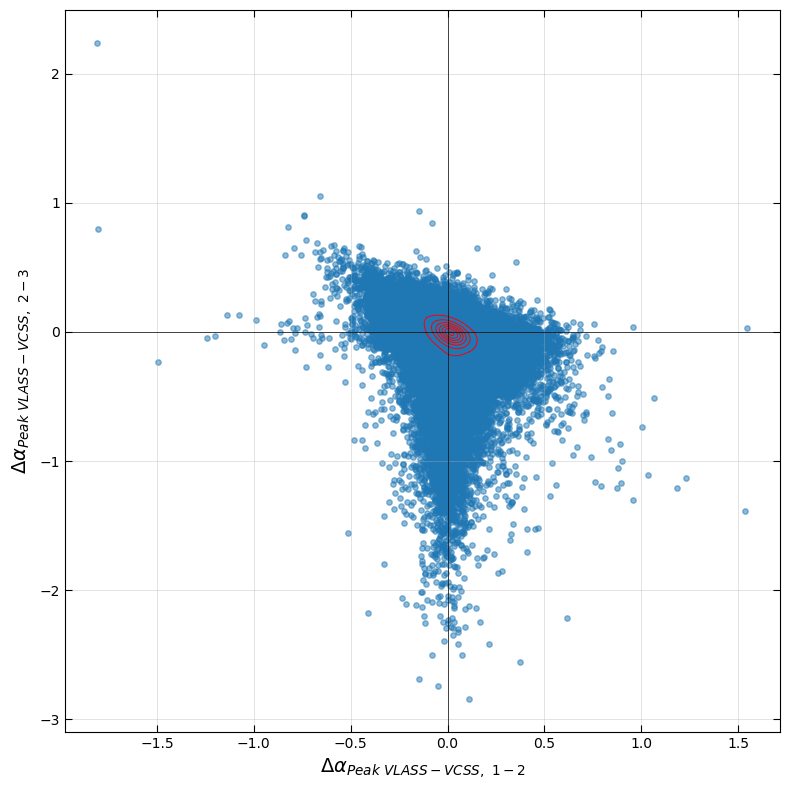

In [312]:
markers_scatter2(path="C://Users/jray/Desktop/Ray/plotting/si_var_params.csv",
                x_list=['delta SI (VLASS-VCSS Peak 1-2)'],
                xlog_list=[False],
                y='delta SI (VLASS-VCSS Peak 2-3)',
                ylog=False,
                w=None,
                wlog=False,
                xlabel=r'$\Delta\alpha_{Peak \ VLASS-VCSS, \ 1-2}$',
                ylabel=r'$\Delta\alpha_{Peak \ VLASS-VCSS, \ 2-3}$',
                y2label='',
                cblabel='',
                title='',
                fit=False)

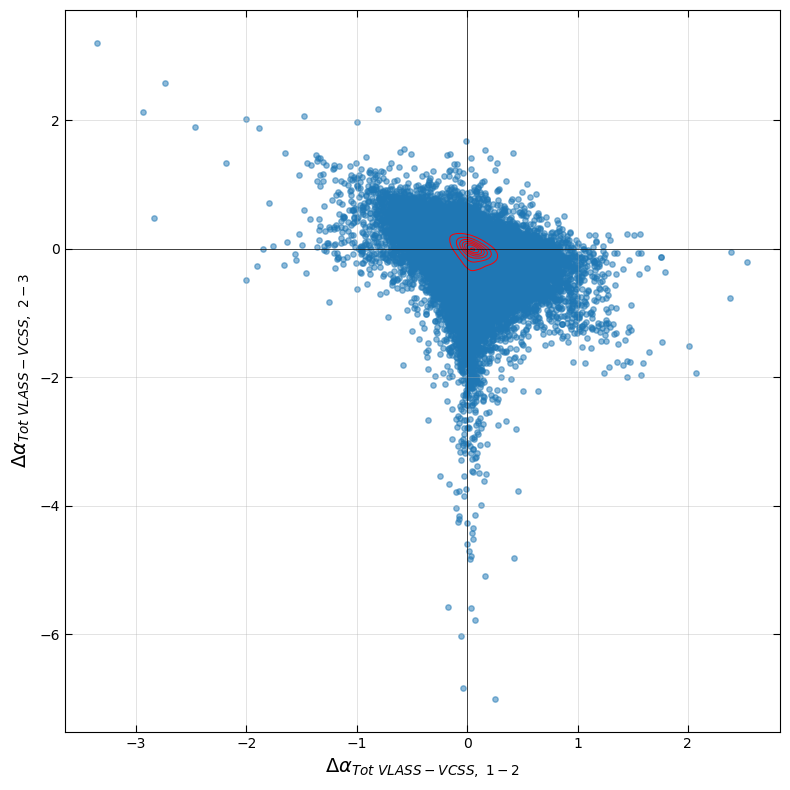

In [313]:
markers_scatter2(path="C://Users/jray/Desktop/Ray/plotting/params2.csv",
                x_list=['delta SI (VLASS-VCSS Tot 1-2)'],
                xlog_list=[False],
                y='delta SI (VLASS-VCSS Tot 2-3)',
                ylog=False,
                w=None,
                wlog=False,
                xlabel=r'$\Delta\alpha_{Tot \ VLASS-VCSS, \ 1-2}$',
                ylabel=r'$\Delta\alpha_{Tot \ VLASS-VCSS, \ 2-3}$',
                y2label='',
                cblabel='',
                title='',
                fit=False)

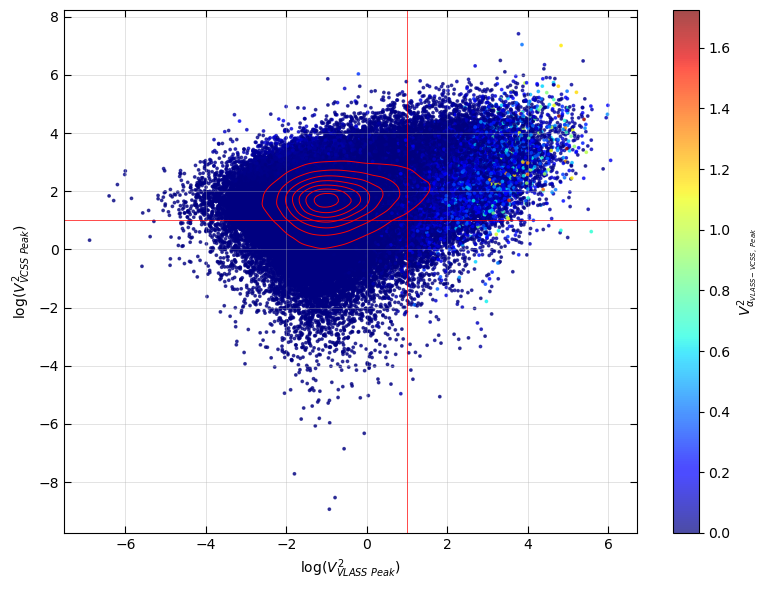

In [290]:
scatter(path="C://Users/jray/Desktop/Ray/plotting/si_var_params.csv",
        x='Variance (VLASS Peak)', 
        xlog=True, 
        y='Variance (VCSS Peak)', 
        ylog=True, 
        w='SI variance (VLASS-VCSS Peak)',
        wlog=False,
        xlabel=r'$\log(V^{2}_{VLASS \ Peak})$',
        ylabel=r'$\log(V^{2}_{VCSS \ Peak})$',
        cblabel=r'$V^{2}_{\alpha_{VLASS-VCSS, \ Peak}}$',
        title='',
        fit=False)

In [ ]:
# F_s vs alpha var
#alpha 1-2 vs alpha 2-3
# S vs alpha x3
# del alpha (peak)


In [ ]:
path = "C://Users/jray/Desktop/Ray/"
x = ""
y = ""
w = ""
xlabel = ""
ylabel = ""
cblabel = ""
title = ""

df = pd.read_csv(path)

''' masks
pandas:
mask = df[''] == threshold & th | th
df = df1.loc[mask]

matplotlib:
mask_x = np.ma.masked_where(x > 0, x) 
mask_y = np.ma.masked_where(x > 0, y) <- masks y values based on x criteria, therefore can read in a column for masking
...
plt.scatter(mask_x, mask_y OR c=mask_x, s=mask_y) <- plot only msaked values or colorize/size by masked values
'''


x = df[x].values
y = df[y].values
w = df[w].values

# for multiple, do x2, y2, etc., and fig, axs for axs[0] & [1]

''' log
x = np.log10(np.where(x > 0, x, np.nan))
y = np.log10(np.where(y > 0, y, np.nan))
w = np.log10(np.where(w > 0, w, np.nan))
'''

valid = ~np.isnan(x) & ~np.isnan(y) & ~np.isnan(w)
x = x[valid].reshape(-1, 1)
y = y[valid]
w = w[valid]
   
fig, ax = plt.subplots(figsize=(8, 6))
sc = ax.scatter(x, y, c=w, cmap='jet', s=12, alpha=0.7, marker='.')
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)

'''multi scatter (no space)
fig, axs = plt.subplots(3, 1, sharex=True) <- or sharey ; =ax1 when plotting separately
# Remove vertical space between axs
fig.subplots_adjust(hspace=0)
'''

''' skyplot
plt.subplot(projection=Molleweide)
plt.gride(True)
'''

''' scatter w/ hists
fig, axs = plt.subplot_mosaic([['histx', '.'],
                               ['scatter', 'histy']],
                              figsize=(6, 6),
                              width_ratios=(4, 1), height_ratios=(1, 4),
                              layout='constrained')
scatter_hist(x, y, axs['scatter'], axs['histx'], axs['histy'])
'''

cbar = fig.colorbar(sc, ax=ax)
cbar.set_label(cblabel)

''' fit
model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)
r2 = r2_score(y, y_pred)
coeff = model.coef_[0]
intercept = model.intercept_   
ax.plot(x, y_pred, color='black', linewidth=1, label=f"$y = {coeff:.2f}x + {intercept:.2f}$")
ax.legend()
ax.set_title(f"{title}\n$R^2 = {r2:.3f}$")
'''

ax.set_title(title)

'''lines
plt.axvline(x=1, color='r', lw=0.5)
plt.axhline(y=1, color='r', lw=0.5)
'''

''' contour
xy = np.vstack([x_i, y_i])
kde = gaussian_kde(xy)
x_grid = np.linspace(x_i.min(), x_i.max(), 100)
y_grid = np.linspace(y_i.min(), y_i.max(), 100)
X, Y = np.meshgrid(x_grid, y_grid)
positions = np.vstack([X.ravel(), Y.ravel()])
Z = kde(positions).reshape(X.shape)
plt.contour(X, Y, Z, colors='r', levels=8, linewidths=0.7)
'''

ax.tick_params(direction='in', length=5, top=True, bottom=True, left=True, right=True)
ax.grid(lw=0.5, alpha=0.5)
plt.tight_layout()
plt.show()

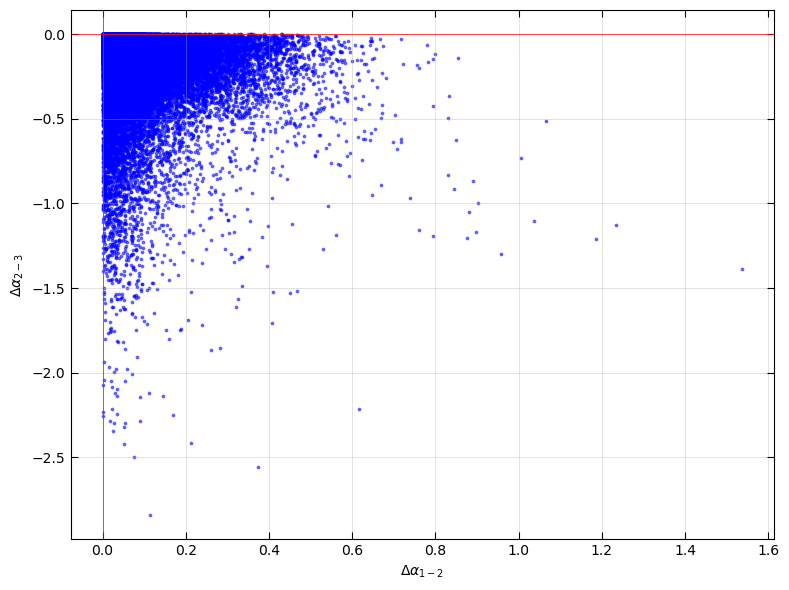

In [113]:
path = "C://Users/jray/Desktop/Ray/Plotting/si_pk.csv"
x = "delta SI (VLASS-VCSS Peak 1-2)"
y = "delta SI (VLASS-VCSS Peak 2-3)"
xlabel = r'$\Delta\alpha_{1-2}$'
ylabel = r'$\Delta\alpha_{2-3}$'
title = ""

df = pd.read_csv(path)

x = df[x].values
y = df[y].values

mask_x = np.ma.masked_where(x < 0, x) 
mask_y = np.ma.masked_where(y > 0, y)

valid = ~np.isnan(mask_x) & ~np.isnan(mask_y)
mask_x = mask_x[valid]
mask_y = mask_y[valid]

fig, ax = plt.subplots(figsize=(8, 6))
sc = ax.scatter(mask_x, mask_y, c='b', s=12, alpha=0.5, marker='.')
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)

ax.set_title(title)

plt.axvline(x=0, color='r', lw=0.5)
plt.axhline(y=0, color='r', lw=0.5)


ax.tick_params(direction='in', length=5, top=True, bottom=True, left=True, right=True)
ax.grid(lw=0.5, alpha=0.5)
plt.tight_layout()
plt.show()

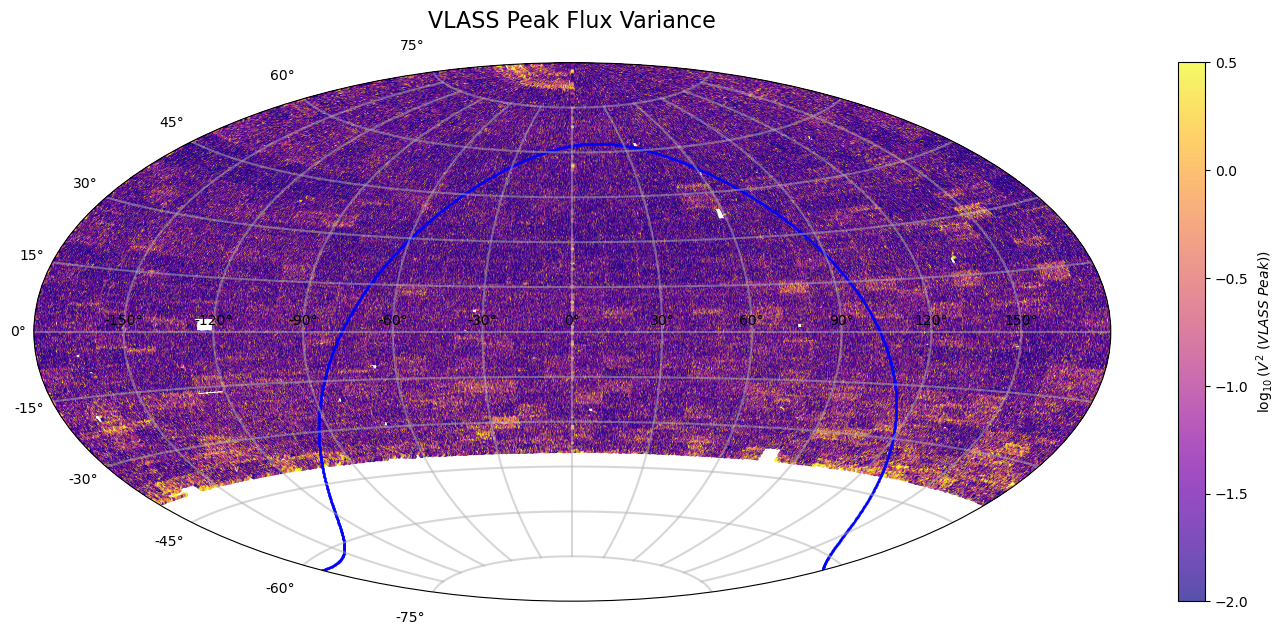

In [302]:
from astropy.visualization import simple_norm
from astropy.coordinates import SkyCoord

path = "C://Users/jray/Desktop/Ray/Plotting/var.csv"
x = "RA_avg"
y = "DEC_avg"
w = "Variance (VLASS Peak)"
cblabel = r'$\log_{10}(V^{2} \ (VLASS \ Peak))$'
title = "VLASS Peak Flux Variance\n"

df = pd.read_csv(path)

x = Angle(df[x].values * u.deg).wrap_at(180*u.deg).rad
y = Angle(df[y].values * u.deg).rad
w = df[w].values

mask = (~np.isnan(x)) & (~np.isnan(y)) & (w > 0)
x = x[mask]
y = y[mask]
w = w[mask]
w = np.log10(w)

fig = plt.figure(figsize=(14, 8))
ax = fig.add_subplot(111, projection="aitoff")
plt.scatter(x, y, c=w, cmap='plasma', s=2, alpha = 0.7, vmin=-2, vmax=0.5, rasterized=True)

cbar = plt.colorbar(ax=ax, shrink=0.7)
cbar.set_label(cblabel)

ax.set_title(title, fontsize=16)


l=np.arange(0, 360, 0.05)
b=[0.]*7200
gp_arr = np.array(list(zip(l,b)))
gp = SkyCoord(gp_arr * u.deg,frame='galactic').icrs
ax.scatter(gp.ra.wrap_at(180*u.deg).rad[::4], gp.dec.rad[::4], c='b', s=0.7, alpha=0.7)


plt.grid(True, lw=1.5, alpha=0.5)
ax.tick_params(direction='in', colors='black', length=0, top=True, bottom=True, left=True, right=True)
plt.tight_layout()
plt.show()

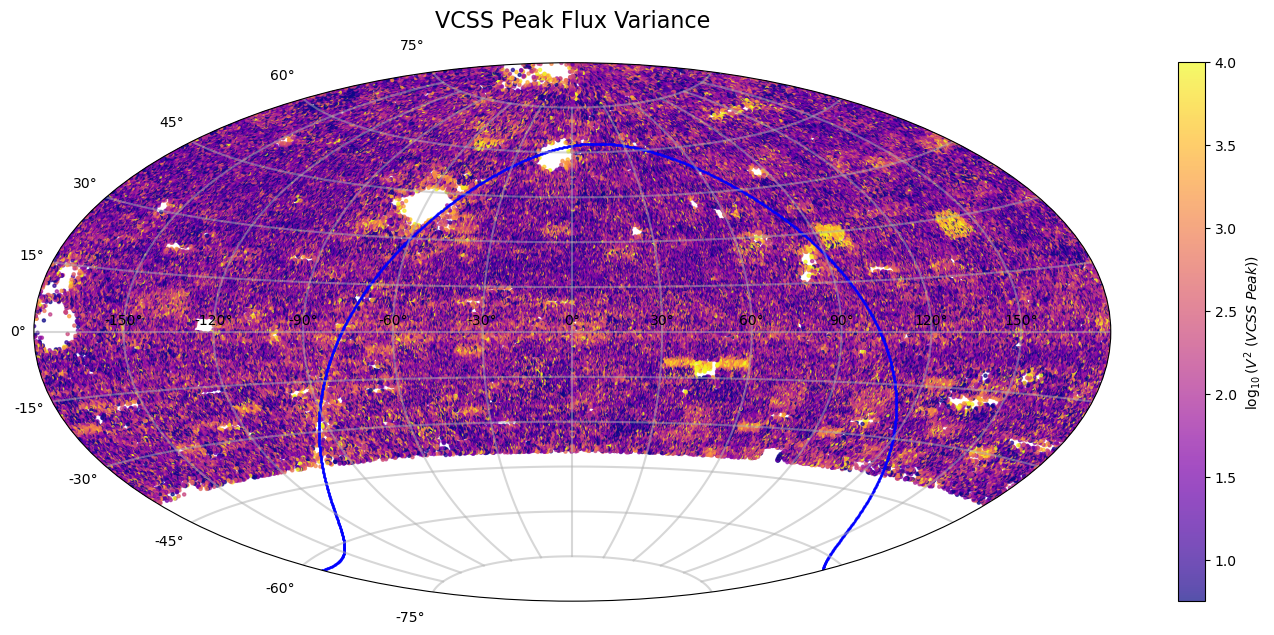

In [305]:
from astropy.visualization import simple_norm
from astropy.coordinates import SkyCoord

path = "C://Users/jray/Desktop/Ray/Plotting/var.csv"
x = "RA_avg"
y = "DEC_avg"
w = "Variance (VCSS Peak)"
cblabel = r'$\log_{10}(V^{2} \ (VCSS \ Peak))$'
title = "VCSS Peak Flux Variance\n"

df = pd.read_csv(path)

x = Angle(df[x].values * u.deg).wrap_at(180*u.deg).rad
y = Angle(df[y].values * u.deg).rad
w = df[w].values

mask = (~np.isnan(x)) & (~np.isnan(y)) & (w > 0)
x = x[mask]
y = y[mask]
w = w[mask]
w = np.log10(w)

fig = plt.figure(figsize=(14, 8))
ax = fig.add_subplot(111, projection="aitoff")
plt.scatter(x, y, c=w, cmap='plasma', s=5, alpha = 0.7, vmin=0.75, vmax=4, rasterized=True)

cbar = plt.colorbar(ax=ax, shrink=0.7)
cbar.set_label(cblabel)

ax.set_title(title, fontsize=16)


l=np.arange(0, 360, 0.05)
b=[0.]*7200
gp_arr = np.array(list(zip(l,b)))
gp = SkyCoord(gp_arr * u.deg,frame='galactic').icrs
ax.scatter(gp.ra.wrap_at(180*u.deg).rad[::4], gp.dec.rad[::4], c='b', s=0.7, alpha=0.7)


plt.grid(True, lw=1.5, alpha=0.5)
ax.tick_params(direction='in', colors='black', length=0, top=True, bottom=True, left=True, right=True)
plt.tight_layout()
plt.show()

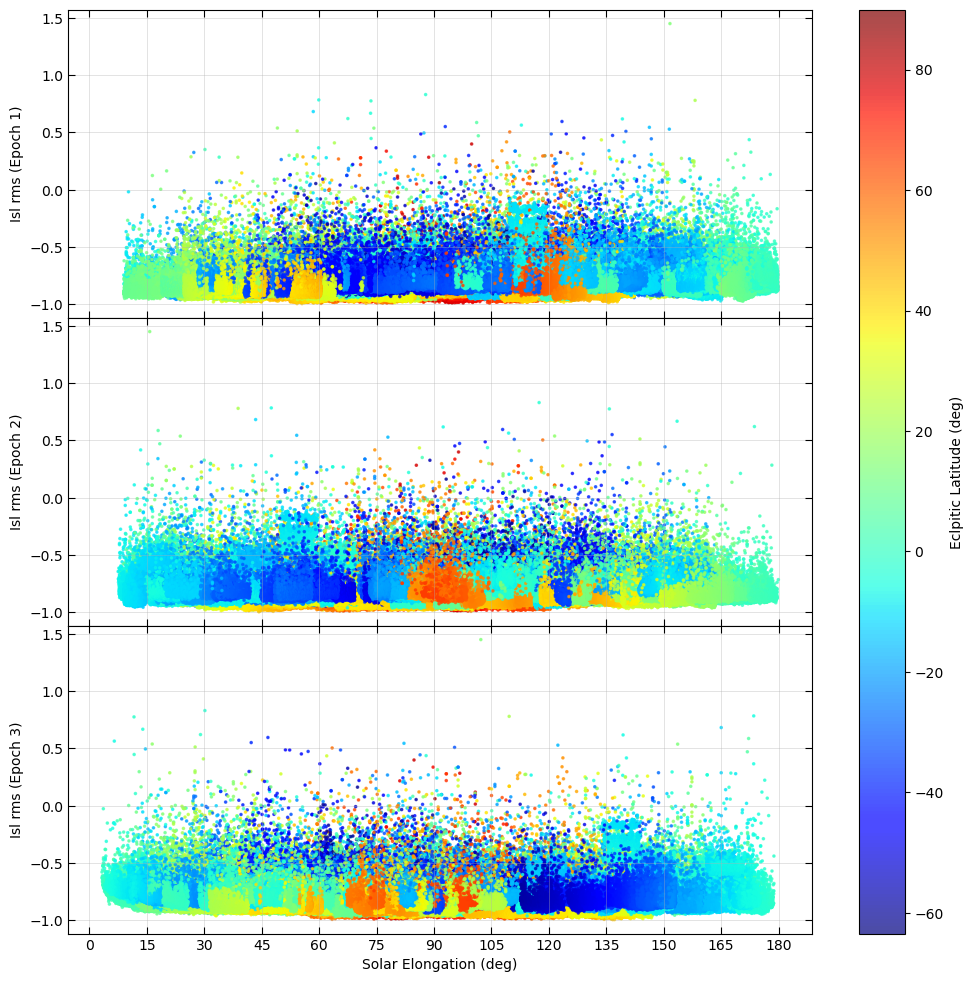

In [292]:
path = "C://Users/jray/Desktop/Ray/Plotting/se_isl.csv"
x1 = "SE_1"
x2 = "SE_2"
x3 = "SE_3"
y1 = "Isl_rms_1"
y2 = "Isl_rms_2"
y3 = "Isl_rms_3"
w = "EL_avg"
xlabel = "Solar Elongation (deg)"
y1label = "Isl rms (Epoch 1)"
y2label = "Isl rms (Epoch 2)"
y3label = "Isl rms (Epoch 3)"
cblabel = "Eclpitic Latitude (deg)"
title = ""

df = pd.read_csv(path)

x1 = df[x1].values
x2 = df[x2].values
x3 = df[x3].values
y1 = df[y3].values
y2 = df[y3].values
y3 = df[y3].values
w = df[w].values

y1 = np.log10(np.where(y1 > 0, y1, np.nan))
y2 = np.log10(np.where(y2 > 0, y2, np.nan))
y3 = np.log10(np.where(y3 > 0, y3, np.nan))

valid = ~np.isnan(x1) & ~np.isnan(x2) & ~np.isnan(x3) & ~np.isnan(y1) & ~np.isnan(y2) & ~np.isnan(y3) & ~np.isnan(w)
x1 = x1[valid]
x2 = x2[valid]
x3 = x3[valid]
y1 = y1[valid]
y2 = y2[valid]
y3 = y3[valid]
w = w[valid]

fig, axs = plt.subplots(3, 1, sharex=True, figsize=(12, 12))
fig.subplots_adjust(hspace=0)

sc1 = axs[0].scatter(x1, y1, c=w, cmap='jet', s=10, alpha=0.7, marker='.')
sc2 = axs[1].scatter(x2, y2, c=w, cmap='jet', s=10, alpha=0.7, marker='.')
sc3 = axs[2].scatter(x3, y3, c=w, cmap='jet', s=10, alpha=0.7, marker='.')

axs[2].set_xlabel(xlabel)
axs[0].set_ylabel(y1label)
axs[1].set_ylabel(y2label)
axs[2].set_ylabel(y3label)

cbar = fig.colorbar(sc1, ax=axs.ravel().tolist())
cbar.set_label(cblabel)

'''
xy = np.vstack([x_i, y_i])
kde = gaussian_kde(xy)
x_grid = np.linspace(x_i.min(), x_i.max(), 100)
y_grid = np.linspace(y_i.min(), y_i.max(), 100)
X, Y = np.meshgrid(x_grid, y_grid)
positions = np.vstack([X.ravel(), Y.ravel()])
Z = kde(positions).reshape(X.shape)
plt.contour(X, Y, Z, colors='r', levels=8, linewidths=0.7)
'''

axs[0].set_xticks([0, 15, 30, 45, 60, 75, 90, 105, 120, 135, 150, 165, 180])
axs[1].set_xticks([0, 15, 30, 45, 60, 75, 90, 105, 120, 135, 150, 165, 180])
axs[2].set_xticks([0, 15, 30, 45, 60, 75, 90, 105, 120, 135, 150, 165, 180])
axs[0].tick_params(direction='in', length=5, top=True, bottom=True, left=True, right=True)
axs[1].tick_params(direction='in', length=5, top=True, bottom=True, left=True, right=True)
axs[2].tick_params(direction='in', length=5, top=True, bottom=True, left=True, right=True)
axs[0].grid(lw=0.5, alpha=0.5)
axs[1].grid(lw=0.5, alpha=0.5)
axs[2].grid(lw=0.5, alpha=0.5)
plt.show()

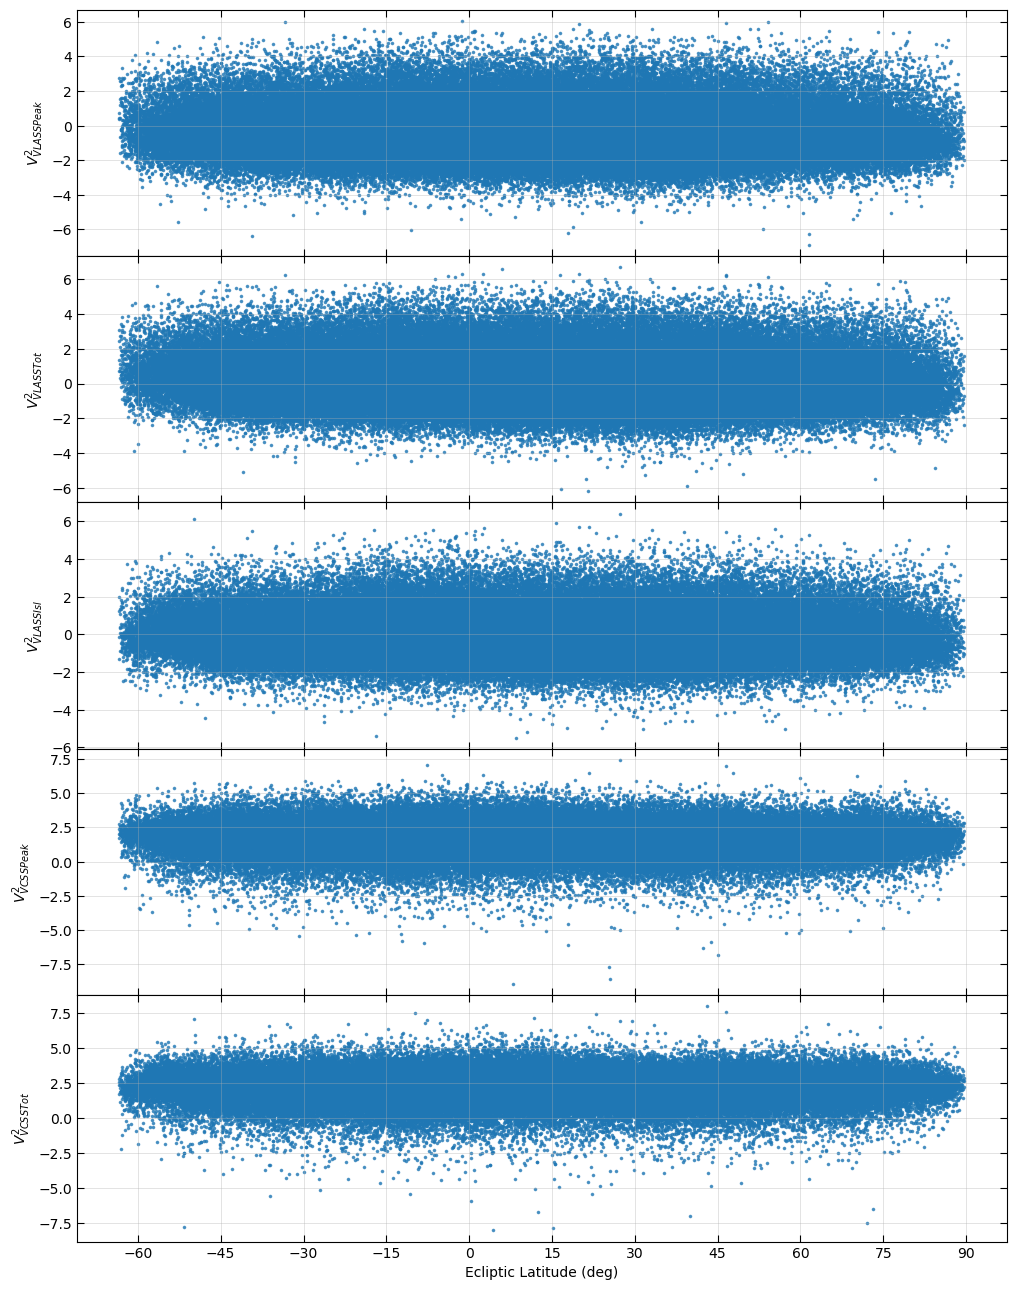

In [269]:
path = "C://Users/jray/Desktop/Ray/Plotting/se_isl.csv"
x1 = "EL_avg"
x2 = "EL_avg"
x3 = "EL_avg"
x4 = "EL_avg"
x5 = "EL_avg"
y1 = "Variance (VLASS Peak)"
y2 = "Variance (VLASS Tot)"
y3 = "Variance (VLASS Isl)"
y4 = "Variance (VCSS Peak)"
y5 = "Variance (VCSS Tot)"
xlabel = "Ecliptic Latitude (deg)"
y1label = r'$V^{2}_{VLASS Peak}$'
y2label = r'$V^{2}_{VLASS Tot}$'
y3label = r'$V^{2}_{VLASS Isl}$'
y4label = r'$V^{2}_{VCSS Peak}$'
y5label = r'$V^{2}_{VCSS Tot}$'

df = pd.read_csv(path)

x1 = df[x1].values
x2 = df[x2].values
x3 = df[x3].values
x4 = df[x4].values
x5 = df[x5].values
y1 = df[y1].values
y2 = df[y2].values
y3 = df[y3].values
y4 = df[y4].values
y5 = df[y5].values

y1 = np.log10(np.where(y1 > 0, y1, np.nan))
y2 = np.log10(np.where(y2 > 0, y2, np.nan))
y3 = np.log10(np.where(y3 > 0, y3, np.nan))
y4 = np.log10(np.where(y4 > 0, y4, np.nan))
y5 = np.log10(np.where(y5 > 0, y5, np.nan))

valid = ~np.isnan(x1) & ~np.isnan(x2) & ~np.isnan(x3) & ~np.isnan(x4) & ~np.isnan(x5) & ~np.isnan(y1) & ~np.isnan(y2) & ~np.isnan(y3) & ~np.isnan(y4) & ~np.isnan(y5)
x1 = x1[valid]
x2 = x2[valid]
x3 = x3[valid]
x4 = x4[valid]
x5 = x5[valid]
y1 = y1[valid]
y2 = y2[valid]
y3 = y3[valid]
y4 = y4[valid]
y5 = y5[valid]

fig, axs = plt.subplots(5, 1, sharex=True, figsize=(12, 16))
fig.subplots_adjust(hspace=0)

sc1 = axs[0].scatter(x1, y1, s=10, alpha=0.7, marker='.')
sc2 = axs[1].scatter(x2, y2, s=10, alpha=0.7, marker='.')
sc3 = axs[2].scatter(x3, y3, s=10, alpha=0.7, marker='.')
sc4 = axs[3].scatter(x4, y4, s=10, alpha=0.7, marker='.')
sc5 = axs[4].scatter(x5, y5, s=10, alpha=0.7, marker='.')

axs[4].set_xlabel(xlabel)
axs[0].set_ylabel(y1label)
axs[1].set_ylabel(y2label)
axs[2].set_ylabel(y3label)
axs[3].set_ylabel(y4label)
axs[4].set_ylabel(y5label)


'''
xy = np.vstack([x_i, y_i])
kde = gaussian_kde(xy)
x_grid = np.linspace(x_i.min(), x_i.max(), 100)
y_grid = np.linspace(y_i.min(), y_i.max(), 100)
X, Y = np.meshgrid(x_grid, y_grid)
positions = np.vstack([X.ravel(), Y.ravel()])
Z = kde(positions).reshape(X.shape)
plt.contour(X, Y, Z, colors='r', levels=8, linewidths=0.7)
'''

axs[0].set_xticks([-60, -45, -30, -15, 0, 15, 30, 45, 60, 75, 90])
axs[1].set_xticks([-60, -45, -30, -15, 0, 15, 30, 45, 60, 75, 90])
axs[2].set_xticks([-60, -45, -30, -15, 0, 15, 30, 45, 60, 75, 90])
axs[3].set_xticks([-60, -45, -30, -15, 0, 15, 30, 45, 60, 75, 90])
axs[4].set_xticks([-60, -45, -30, -15, 0, 15, 30, 45, 60, 75, 90])

axs[0].tick_params(direction='in', length=5, top=True, bottom=True, left=True, right=True)
axs[1].tick_params(direction='in', length=5, top=True, bottom=True, left=True, right=True)
axs[2].tick_params(direction='in', length=5, top=True, bottom=True, left=True, right=True)
axs[3].tick_params(direction='in', length=5, top=True, bottom=True, left=True, right=True)
axs[4].tick_params(direction='in', length=5, top=True, bottom=True, left=True, right=True)

axs[0].grid(lw=0.5, alpha=0.5)
axs[1].grid(lw=0.5, alpha=0.5)
axs[2].grid(lw=0.5, alpha=0.5)
axs[3].grid(lw=0.5, alpha=0.5)
axs[4].grid(lw=0.5, alpha=0.5)

plt.show()

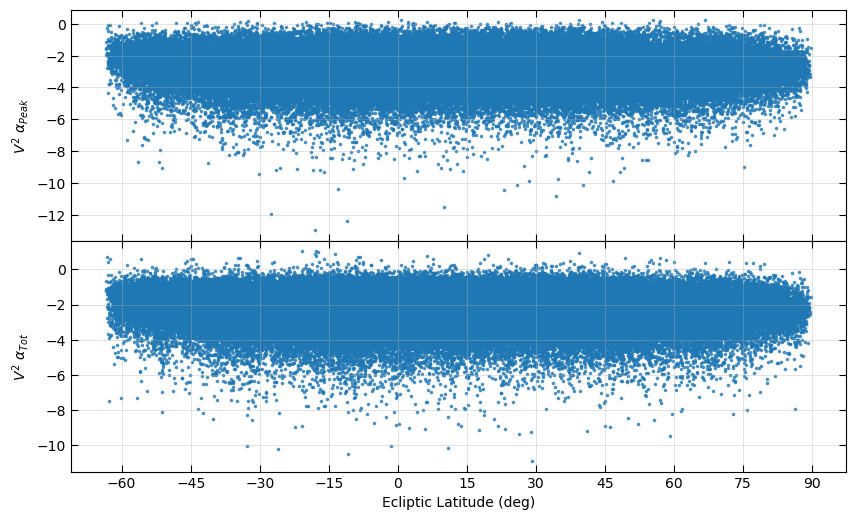

In [280]:
path = "C://Users/jray/Desktop/Ray/Plotting/se_isl.csv"
x1 = "EL_avg"
x2 = "EL_avg"
y1 = "SI variance (VLASS-VCSS Peak)"
y2 = "SI variance (VLASS-VCSS Tot)"
xlabel = "Ecliptic Latitude (deg)"
y1label = r'$V^{2} \ \alpha_{Peak}$'
y2label = r'$V^{2} \ \alpha_{Tot}$'

df = pd.read_csv(path)

x1 = df[x1].values
x2 = df[x2].values
y1 = df[y1].values
y2 = df[y2].values

y1 = np.log10(np.where(y1 > 0, y1, np.nan))
y2 = np.log10(np.where(y2 > 0, y2, np.nan))

valid = ~np.isnan(x1) & ~np.isnan(x2) & ~np.isnan(y1) & ~np.isnan(y2)
x1 = x1[valid]
x2 = x2[valid]
y1 = y1[valid]
y2 = y2[valid]

fig, axs = plt.subplots(2, 1, sharex=True, figsize=(10, 6))
fig.subplots_adjust(hspace=0)

sc1 = axs[0].scatter(x1, y1, s=10, alpha=0.7, marker='.')
sc2 = axs[1].scatter(x2, y2, s=10, alpha=0.7, marker='.')

axs[1].set_xlabel(xlabel)
axs[0].set_ylabel(y1label)
axs[1].set_ylabel(y2label)

axs[0].set_xticks([-60, -45, -30, -15, 0, 15, 30, 45, 60, 75, 90])
axs[1].set_xticks([-60, -45, -30, -15, 0, 15, 30, 45, 60, 75, 90])

axs[0].tick_params(direction='in', length=5, top=True, bottom=True, left=True, right=True)
axs[1].tick_params(direction='in', length=5, top=True, bottom=True, left=True, right=True)

axs[0].grid(lw=0.5, alpha=0.5)
axs[1].grid(lw=0.5, alpha=0.5)

plt.show()

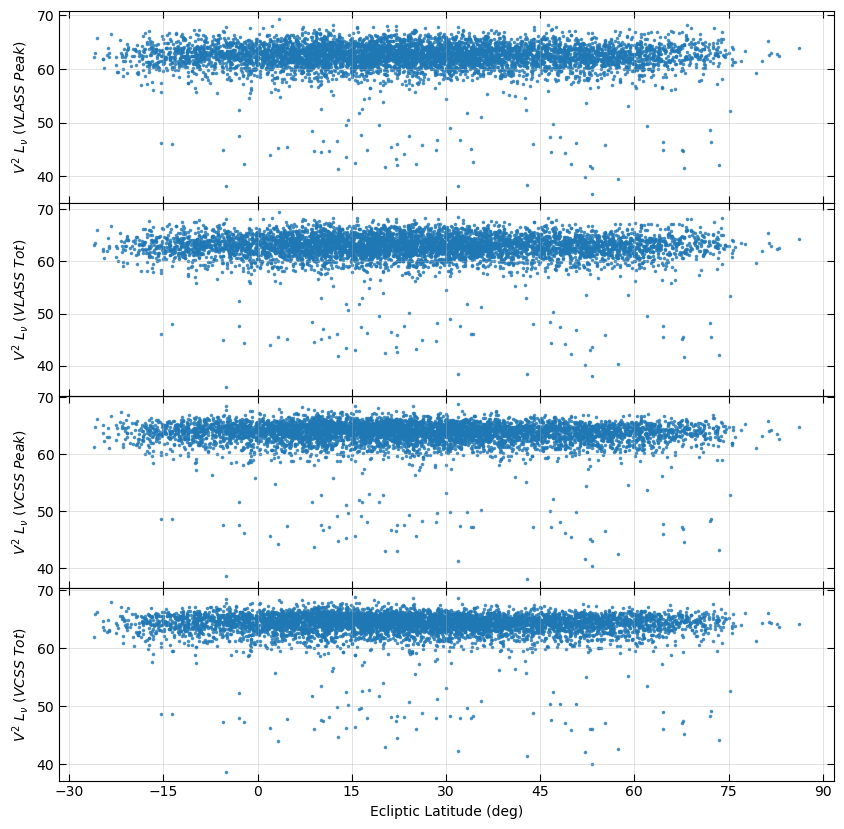

In [278]:
path = "C://Users/jray/Desktop/Ray/Plotting/se_isl.csv"
x1 = "EL_avg"
x2 = "EL_avg"
x3 = "EL_avg"
x4 = "EL_avg"
y1 = "Luminosity Variance (VLASS Peak)"
y2 = "Luminosity Variance (VLASS Tot)"
y3 = "Luminosity Variance (VCSS Peak)"
y4 = "Luminosity Variance (VCSS Tot)"
xlabel = "Ecliptic Latitude (deg)"
y1label = r'$V^{2} \ L_{\nu} \ (VLASS \ Peak)$'
y2label = r'$V^{2} \ L_{\nu} \ (VLASS \ Tot)$'
y3label = r'$V^{2} \ L_{\nu} \ (VCSS \ Peak)$'
y4label = r'$V^{2} \ L_{\nu} \ (VCSS \ Tot)$'

df = pd.read_csv(path)

x1 = df[x1].values
x2 = df[x2].values
x3 = df[x3].values
x4 = df[x4].values
y1 = df[y1].values
y2 = df[y2].values
y3 = df[y3].values
y4 = df[y4].values

y1 = np.log10(np.where(y1 > 0, y1, np.nan))
y2 = np.log10(np.where(y2 > 0, y2, np.nan))
y3 = np.log10(np.where(y3 > 0, y3, np.nan))
y4 = np.log10(np.where(y4 > 0, y4, np.nan))

valid = ~np.isnan(x1) & ~np.isnan(x2) & ~np.isnan(x3) & ~np.isnan(x4) & ~np.isnan(y1) & ~np.isnan(y2) & ~np.isnan(y3) & ~np.isnan(y4)
x1 = x1[valid]
x2 = x2[valid]
x3 = x3[valid]
x4 = x4[valid]
y1 = y1[valid]
y2 = y2[valid]
y3 = y3[valid]
y4 = y4[valid]

fig, axs = plt.subplots(4, 1, sharex=True, figsize=(10, 10))
fig.subplots_adjust(hspace=0)

sc1 = axs[0].scatter(x1, y1, s=10, alpha=0.7, marker='.')
sc2 = axs[1].scatter(x2, y2, s=10, alpha=0.7, marker='.')
sc3 = axs[2].scatter(x3, y3, s=10, alpha=0.7, marker='.')
sc4 = axs[3].scatter(x4, y4, s=10, alpha=0.7, marker='.')

axs[3].set_xlabel(xlabel)
axs[0].set_ylabel(y1label)
axs[1].set_ylabel(y2label)
axs[2].set_ylabel(y3label)
axs[3].set_ylabel(y4label)


axs[0].set_xticks([-30, -15, 0, 15, 30, 45, 60, 75, 90])
axs[1].set_xticks([-30, -15, 0, 15, 30, 45, 60, 75, 90])
axs[2].set_xticks([-30, -15, 0, 15, 30, 45, 60, 75, 90])
axs[3].set_xticks([-30, -15, 0, 15, 30, 45, 60, 75, 90])

axs[0].tick_params(direction='in', length=5, top=True, bottom=True, left=True, right=True)
axs[1].tick_params(direction='in', length=5, top=True, bottom=True, left=True, right=True)
axs[2].tick_params(direction='in', length=5, top=True, bottom=True, left=True, right=True)
axs[3].tick_params(direction='in', length=5, top=True, bottom=True, left=True, right=True)

axs[0].grid(lw=0.5, alpha=0.5)
axs[1].grid(lw=0.5, alpha=0.5)
axs[2].grid(lw=0.5, alpha=0.5)
axs[3].grid(lw=0.5, alpha=0.5)

plt.show()